In [1]:
import numpy as np
from  matplotlib import pyplot as plt
from random import sample
from math import radians
from scipy.optimize import fmin
from scipy.stats import ks_2samp

# Homework #3, Data Analysis and Geostatistics Fall 2024
## Gus Tropea

### Overview and dataset

Download the dataset of ice velocity as a function of depth for Worthington Glacier, Alaska, located in the course Google Drive folder, under the folder “HW3”. 

The dataset is in an ascii file called icevelocity.txt, with column 1 containing the depth $z$ in $[\mathrm{m}]$, and column 2
containing the associated observed ice velocity $v_{0}(z)$ in $[\mathrm{m}/\mathrm{yr}]$.

In [2]:
iceData = np.loadtxt('data/icevelocity.txt')
depth = iceData[:,0]
velocity = iceData[:,1]

### Parameter Optimization
#### Parametric Statistical Models

A very common family of parametric models are polynomials: $$v_{m}(z)=A_{0}+A_{1}z+A_{2}z^2+\dots+A_{n}z^n$$ In this first section of the homework, you will fit polynomials, by finding the optimum parameters $A_{n}$, of varying degree $n$. We want a modeled estimate of ice velocity $v_{m}(z)$ as a function of depth $z$.

#### 1. Fit polynomial models of degree 0-4 to the velocity vs. depth data using MATLAB’s polyfit.m function. Evaluate the model at each measured depth using polyval.m. Plot the 5 model curves with the original data, and state the root mean squared error in the legend: $$RMSE=\sqrt{\frac{1}{N}\sum_{i=0}^{N}\left(v_{m}(z)-v_{0}(z)\right)^{2}}$$

In [3]:
def RMSE(vm,v0):
    #FUNCTION: RMSE calculates root mean squared error
    #INPUTS: two vectors of the same length
    #outputs: a RMSE value
    e = np.sqrt(1/np.size(vm)*np.sum((vm-v0)**2))
    return e

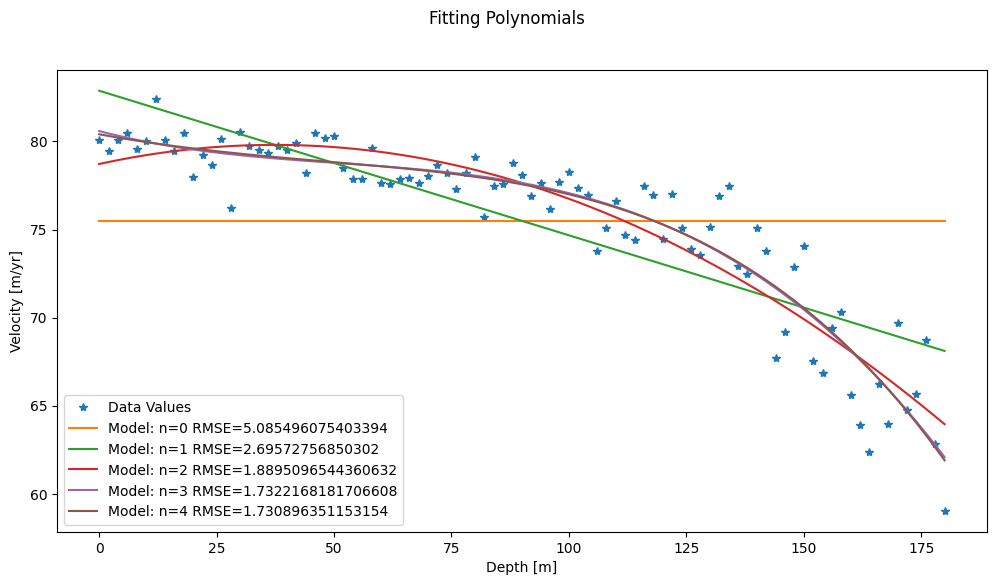

In [4]:
#initialize a matrix of for the model output values
v_m = np.zeros([5,np.size(depth)])
#initialize a vector to store the error of each model
rmse = np.zeros(5)

for n in range(0,5):
    coef = np.polyfit(depth,velocity,deg=n) # Fit the model of degree n
    v_m[n,:] = np.polyval(coef,depth) # store the model output values
    rmse[n] = RMSE(v_m[n,:],velocity) # calculate and store the error of the model

#Plot the models and the actual data values     
fig = plt.figure(figsize=(12,6))
fig.suptitle("Fitting Polynomials")
ax = fig.add_subplot()
ax.plot(depth,velocity,'*', label="Data Values")
for i in range(0,5):
    ax.plot(depth,v_m[i,:], label="Model: n="+str(i)+" RMSE="+str(rmse[i]))
ax.legend()
ax.set_xlabel("Depth [m]")
ax.set_ylabel("Velocity [m/yr]");

#### 2. We fit these 5 models using all of the data for parameter estimation, and therefore we don’t have any information about the uncertainty in these parameter values, nor do we know the uncertainty in the RMSE for each model. To provide estimates of uncertainties in model parameters, repeat the above, but fit the models to a random sampling of 90% of the original data. Store the parameters for each model, and repeat 1000 times (Monte-Carlo). Report the model parameters in a table, using the mean and standard deviation of the 1000 parameter estimates.

In [5]:
def splitData(dataShape, percent):
    #FUNCTION: splitData splits data into train and tests sets
    #INPUTS: the shape of the input data and the percentage two split the data
    #OUTPUTS: a list of indexs for training and a list of the remaining indexs for testing
    r, c = dataShape
    sampleSize = round(percent*r)
    trainIdx = sample(range(0,r),sampleSize)
    testIdx = [idx for idx in range(0,r) if idx not in trainIdx]
    return(trainIdx, testIdx)

In [6]:
#Initialize arrays
A_mean = np.zeros([5,5])
A_std = np.zeros([5,5])
rmse_mean = []
rmse_std = []
runs = 1000;

#run experiments
for n in range(0,5):
    coef = np.zeros([n+1,runs])# store polynomial coefficents
    rmse = [] # store the error
    for i in range(0,runs):
        idx,_ = splitData(iceData.shape,0.9) #Sample 90% of the data
        coef[:,i]=np.polyfit(depth[idx],velocity[idx],deg=n) #Fit to train data
        vals = np.polyval(coef[:,i],depth[idx]) # Get model outputs for train data
        rmse.append(RMSE(vals,velocity[idx])) #calculate error for the model
    #calculate and store statistics
    for h in range(0,n+1):
        A_mean[n,h] = np.mean(coef[h,:])
        A_std[n,h] = np.std(coef[h,:])
    rmse_mean.append(np.mean(rmse))
    rmse_std.append(np.std(rmse))

#Report data    
for n in range(0,5):
    print("======================================")
    print("n = "+str(n))
    print("======================================")
    print(" A_0 Mean Value | "+str(A_mean[n,0])+"\n A_0 Std Value | "+str(A_std[n,0])+"\n A_1 Mean Value | "+str(A_mean[n,1])+"\n A_1 Std Value | "+str(A_std[n,1])+"\n A_2 Mean Value | "+str(A_mean[n,2])+"\n A_2 Std Value | "+str(A_std[n,2])+"\n A_3 Mean Value | "+str(A_mean[n,3])+"\n A_3 Std Value | "+str(A_std[n,3])+"\n A_4 Mean Value | "+str(A_mean[n,4])+"\n A_4 Std Value | "+str(A_std[n,4])+"\n RMSE Mean Value | "+str(rmse_mean[n])+"\n RMSE Std Value | "+str(rmse_std[n]))
    print("======================================\n")

n = 0
 A_0 Mean Value | 75.49219882973173
 A_0 Std Value | 0.18423151130090143
 A_1 Mean Value | 0.0
 A_1 Std Value | 0.0
 A_2 Mean Value | 0.0
 A_2 Std Value | 0.0
 A_3 Mean Value | 0.0
 A_3 Std Value | 0.0
 A_4 Mean Value | 0.0
 A_4 Std Value | 0.0
 RMSE Mean Value | 5.07929464329152
 RMSE Std Value | 0.16178186543700476

n = 1
 A_0 Mean Value | -0.08208952259314006
 A_0 Std Value | 0.0021961368640168667
 A_1 Mean Value | 82.88376494071562
 A_1 Std Value | 0.16308199981412733
 A_2 Mean Value | 0.0
 A_2 Std Value | 0.0
 A_3 Mean Value | 0.0
 A_3 Std Value | 0.0
 A_4 Mean Value | 0.0
 A_4 Std Value | 0.0
 RMSE Mean Value | 2.6884304055150676
 RMSE Std Value | 0.08292640798306682

n = 2
 A_0 Mean Value | -0.000779842095516122
 A_0 Std Value | 3.024243444504284e-05
 A_1 Mean Value | 0.05829956727930859
 A_1 Std Value | 0.004836361710385253
 A_2 Mean Value | 78.7157853307189
 A_2 Std Value | 0.15858488558956915
 A_3 Mean Value | 0.0
 A_3 Std Value | 0.0
 A_4 Mean Value | 0.0
 A_4 Std Valu

### Cross-validation

A much more robust and unbiased approach to estimating the error is called cross-validation. Instead of
calculating the model error using the same data that we used to fit the model, we fit the model to a random
subset (say, 90%) of the total dataset, and use this model to predict at the other locations. The subset of
depths that were not used to fit the model (the remaining 10%) are used to calculate the RMSE. Because
there will be fluctuations in this error depending on how the dataset is subdivided, we repeat this procedure
many times (say, 1000), as we have done before for 1-D data, to get a RMSE probability distribution.

#### 3. Perform a cross-validation, using 90% of the data to fit the 5 polynomial models, and the remaining 10% of data to test, repeating 1000 times. Plot the distribution of RMSE values for each degree polynomial.

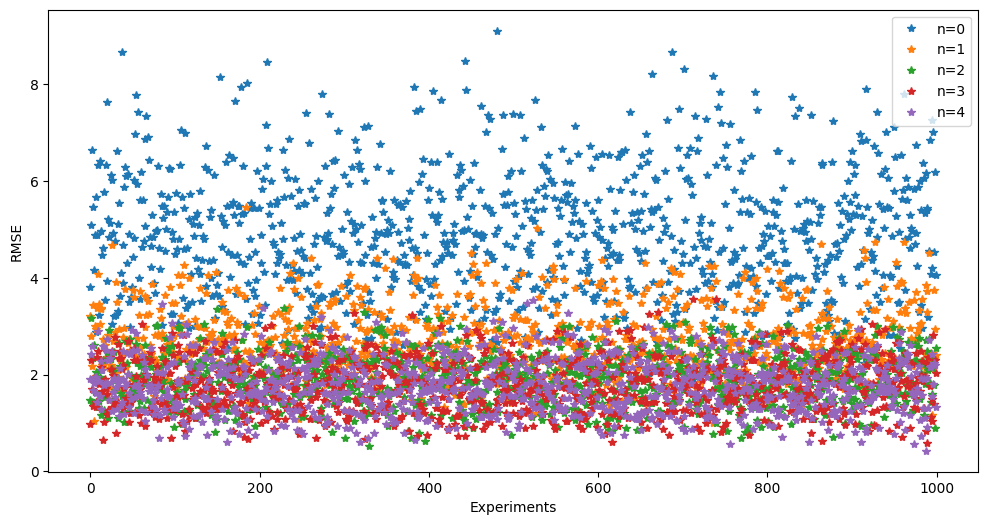

In [7]:
trials= 1000 # number of experiments
rmse = np.zeros([5,trials]) # initialize array for RMSE

for n in range(0,5):
    #Runs experiments
    for i in range(0,trials):
        trainIdx, testIdx = splitData(iceData.shape,0.9) #split data 90/10
        coef = np.polyfit(depth[trainIdx],velocity[trainIdx],deg=n) #fit model to train
        v_m = np.polyval(coef, depth[testIdx]) #Get model output for test
        rmse[n,i] = RMSE(v_m,velocity[testIdx]) #Calculate error for model on test

#plot distrabution of error        
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot()
for i in range(0,5):
    ax.plot(rmse[i],"*",label="n="+str(i))
ax.legend()
ax.set_xlabel("Experiments")
ax.set_ylabel("RMSE");

### Non-parametric statistical models

#### 4. Use a moving window average to estimate the velocity as a function of depth, and plot with the data for a window size of 3,10, and 50 meters.

In [8]:
def movingWindow(x, y, ws,weighted=False):
    #FUNCTION: movingWindow calculates a moving window average
    #INPUTS: vectors of x and corresponding y data, a window size in meters, bool value for using weights
    #OUTPUTS: a vector of the moving window average
    mavg = []
    for i in range(0,len(x)):
        avg = 0
        window = []
        for j in range(0,len(x)):
            if abs(x[i]-x[j])<= ws:
                window.append(y[j])
        if weighted==True:
            weights = [(1-(w/len(window))**2)**2 for w in range(0,len(window))]
            avg = sum(a * b for a, b in zip(weights, window))/(sum(weights))
        else:
            avg = sum(window)/len(window)
        mavg.append(avg)
    return mavg

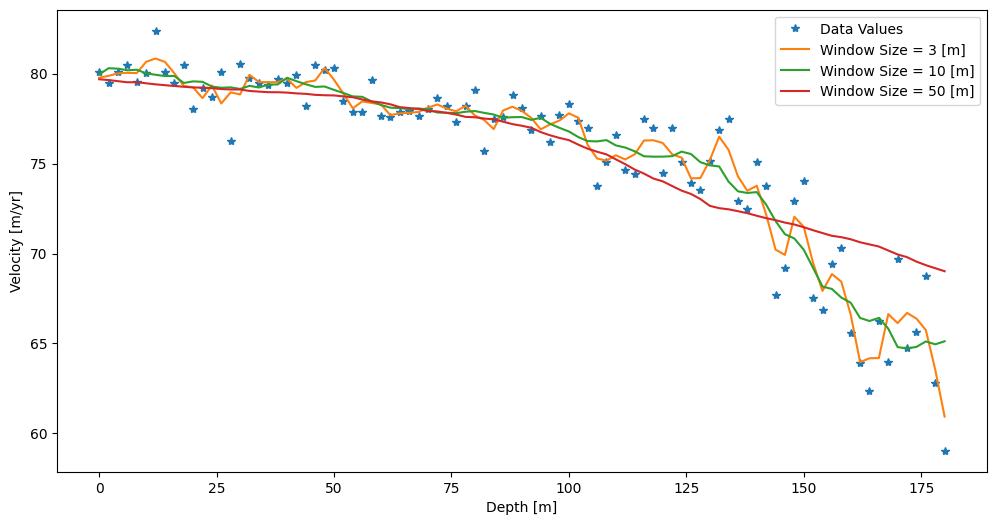

In [9]:
#Calculate moving averages of window sizes 3, 5, and 10
mavg3 = movingWindow(depth,velocity,3)
mavg10 = movingWindow(depth,velocity,10)
mavg50 = movingWindow(depth,velocity,50)

#plot the results
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot()
ax.plot(depth,velocity,'*', label="Data Values")
ax.plot(depth, mavg3, label="Window Size = 3 [m]")
ax.plot(depth,mavg10, label="Window Size = 10 [m]")
ax.plot(depth,mavg50, label="Window Size = 50 [m]")
ax.legend()
ax.set_xlabel("Depth [m]")
ax.set_ylabel("Velocity [m/yr]");

#### 5. Repeat, using a weighted moving window average (non-parametric smooth), for a window size of 3,10, and 50 meters.

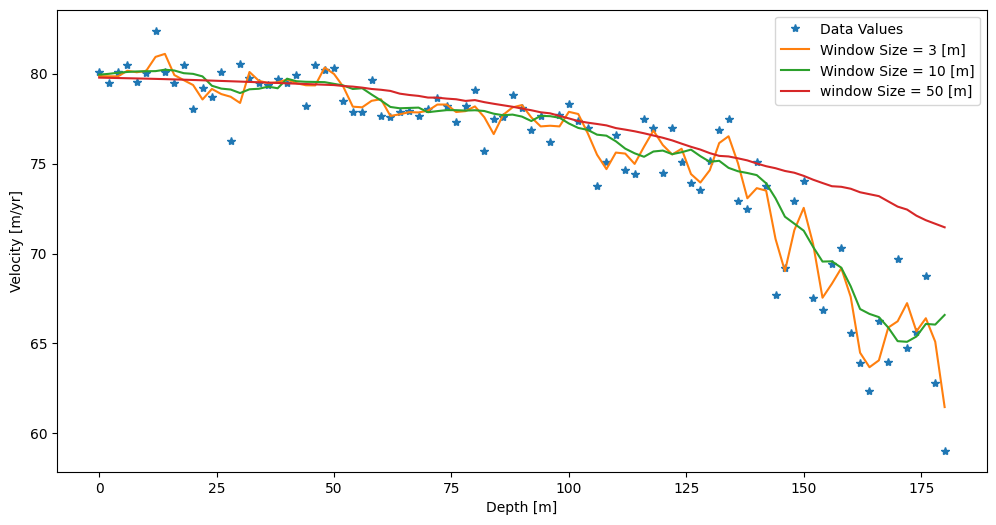

In [10]:
#Calculate moving averages of window sizes 3, 5, and 10 with weights
mavg3 = movingWindow(depth,velocity,3,True)
mavg10 = movingWindow(depth,velocity,10, True)
mavg50 = movingWindow(depth,velocity,50, True)

#Plot the results
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot()
ax.plot(depth,velocity,'*', label="Data Values")
ax.plot(depth, mavg3, label="Window Size = 3 [m]")
ax.plot(depth,mavg10, label="Window Size = 10 [m]")
ax.plot(depth,mavg50, label="window Size = 50 [m]")
ax.legend()
ax.set_xlabel("Depth [m]")
ax.set_ylabel("Velocity [m/yr]");

#### 6. Find the optimum window size for the weighted moving window average model.

In [11]:
errors = []; #initialize array for errors

for w in range(3,51):
    mwindow = movingWindow(depth,velocity,w, True) #Calculate weighted moving average of winow size w
    rmse = RMSE(mwindow,velocity) #Calculate the error of the model
    errors.append(rmse) #store the error

#Find the window size where the error is smallest    
ws = errors.index(min(errors))+3
print("The optimum window size is: "+str(ws))

The optimum window size is: 3


### Theoretical Ice Flow Model

Ice deforms according to the flow law of ice, which has the form $$\dot{\epsilon}_{ij}=A\tau_{e}\tau_{ij}^{n-1}$$ where $\dot{\epsilon}_{ij}$ is the strain-rate tensor, and $\tau_{ij}$ is the deviatoric stress tensor, and $A$ and $n$ are the flow law
parameters. A simple approximation is that of an infinite slab of ice on a slope, for which there are only
shear stresses and the flow law reduces to $$\dot{\epsilon_{xy}}=A\tau_{ij}^{n}$$ $$\frac{\partial u_{x}}{\partial z}=A\left(\rho gz\sin\theta\right)^n$$ where $u_{x}$ is the velocity in the downslope direction, $z$ is the depth below the surface, $g$ is the acceleration due to gravity, and $\theta=10\textdegree$ is the surface slope. This can be integrated to get $$u(z)=u_{x,surf}-A\left(\rho g\sin\theta\right)^{n}z^{n+1}$$

#### 7. Using the measured velocity at a depth of z = 0 m for the surface velocity, ux,surf , find the optimum values for the flow law parameters $A$ and $n$, using the grid search (brute-force) method. Note the MATLAB function $\textit{polyfit.m}$ can’t be used in this case.

In [12]:
def u(a,n,z):
    #FUNCTION: u is for theoretical ice flow as described above
    #INPUTS: Parameters A and n as well as a single depth value
    #OUTPUTS: A calculated velocity 
    rho = 917
    g = 9.8
    theta = radians(10) #degrees
    c = rho*g*np.sin(theta)
    return velocity[0]-(a*(c**n)*(z**(n+1)))   

#initialize arrays for the gridsearch
A_gridsearch = np.linspace(10e-18,10e-15)
N_gridsearch = np.linspace(1,5,10)
error_gridsearch = np.zeros([len(A_gridsearch),len(N_gridsearch)])

#Brute force grid search
for i in range(0,len(A_gridsearch)):
    for j in range(0,len(N_gridsearch)):
        vm = [] #Calculate value over all depths
        for k in range(0,len(depth)):
            vm.append(u(A_gridsearch[i],N_gridsearch[j],depth[k]))
        error_gridsearch[i][j]=RMSE(vm,velocity) #Calculate and store error for  these parameters
#Find the index (A,n) values where the error is the smallest
optimum = np.unravel_index(error_gridsearch.argmin(), error_gridsearch.shape)
print("The optimum value of A is A="+str(A_gridsearch[optimum[0]])+", and the optimum value for n is n="+str(N_gridsearch[optimum[1]]))

The optimum value of A is A=1e-14, and the optimum value for n is n=2.333333333333333


#### 8. Plot the root mean square (RMS) error (mean over all depths) as a function of A and n using MATLAB’s imagesc and colorbar functions.

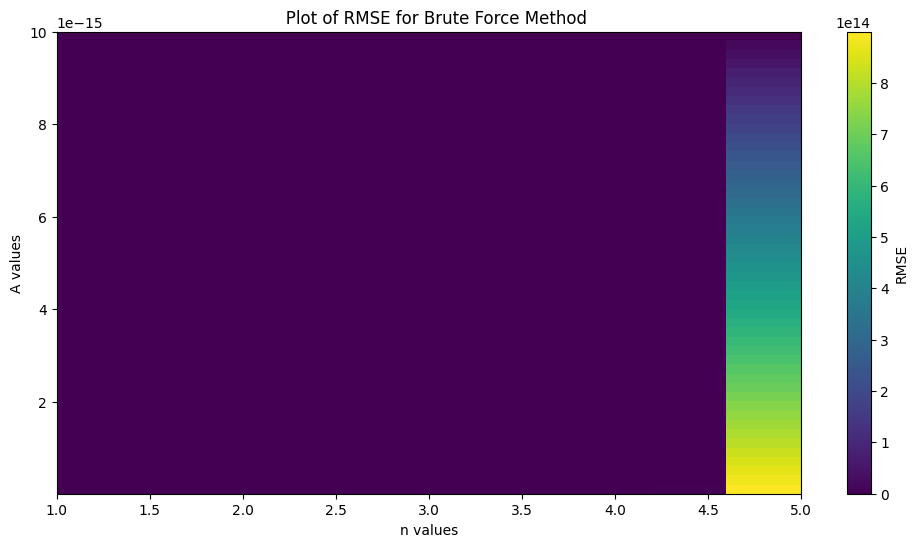

In [13]:
#Plot the results from the grid search
fig8 = plt.figure(figsize=(12,6))
ax8 = fig8.add_subplot()
im = ax8.imshow(error_gridsearch, interpolation='nearest', aspect='auto',extent=[min(N_gridsearch),max(N_gridsearch),min(A_gridsearch),max(A_gridsearch)])
cbar = fig8.colorbar(im,ax=ax8)
im.set_clim([error_gridsearch.min(),error_gridsearch.max()])
cbar.set_label('RMSE')
ax8.set_ylabel('A values')
ax8.set_xlabel('n values')
ax8.set_title('   Plot of RMSE for Brute Force Method');


#### 9. Find the optimum values of A and n using the gradient search method with MATLAB’s fminsearch function.

In [14]:
def u(c,z,n_param):
    #FUNCTION: redfined from above funciton u to better accomedate fmin
    #INPUTS: an array of parameters, a vectors of depth values, fixed n value pass (-1) to search for n
    #OUTPUTS: a calculated velocity
    rho = 917
    g = 9.8
    theta = radians(10) #degrees
    t = rho*g*np.sin(theta)
    nvar = 0
    if n_param == -1:
        nvar = c[1]
    else:
        nvar = n_param
    return velocity[0]-(c[0]*(t**nvar)*(z**(nvar+1)))

def error(c,z,n_param,v0):
    #FUNCTION: error is what fmin is minimizing and is a wrapper for RMSE
    #INPUTS: array of parameters, array of depths,fixed n value (-1) to search, and the true velocities
    #OUTPUTS: RMSE for the set of parameters
    vm = u(c,z,n_param)
    return RMSE(vm,v0)

guess = [1e-18,2] # the initial guess for fmin
xopt = fmin(error,guess,args=(depth,-1,velocity),ftol=10e-16,disp=False) #Run gradient search
print("The optimum A value is A="+str(xopt[0]))
print("The optimum n value is n="+str(xopt[1]))


The optimum A value is A=2.905228759255986e-16
The optimum n value is n=2.6706339238013213


#### 10. Randomly sample 90% of the dataset and find the optimum value of A using the gradient search method, and repeat 1000 times. Plot the distribution of A and the RMS error (over all depths) in the model using a relative density histogram.

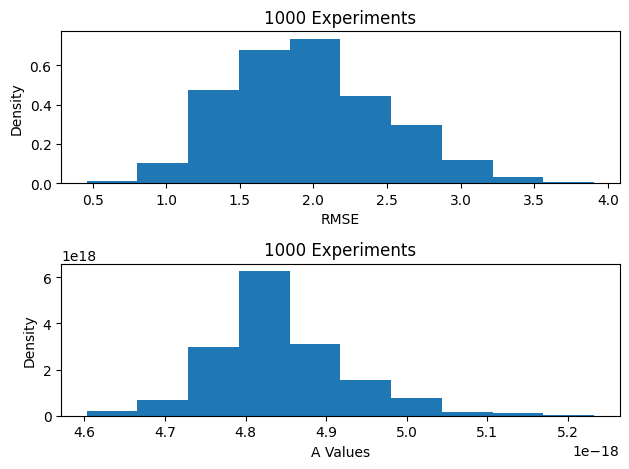

In [15]:
guess = [1e-18] #Inital guess 
A = []
Errors = []

#Run experimments
for s in range(0,1000):
    train, test = splitData(iceData.shape,0.9) #split data 90/10
    aopt = fmin(error,guess,args=(depth[train],3,velocity[train]),ftol=10e-16,disp=False) #fit to training data
    A.append(aopt[0]) #Store A value 
    Errors.append(error(aopt,depth[test],3,velocity[test])) # calculate and store error on test data 

#Plot the results
plt.subplot(2,1,1)
plt.hist(Errors,density=True,range=[min(Errors),max(Errors)]);
plt.title('1000 Experiments')
plt.xlabel('RMSE')
plt.ylabel('Density');
plt.subplot(2,1,2)
plt.hist(A,density=True,range=[min(A),max(A)]);
plt.title('1000 Experiments')
plt.xlabel('A Values')
plt.ylabel('Density');
plt.tight_layout()

#### 11. Plot the mean optimum values of A and its standard deviation with vertical errorbars on your figure from \#8.

[8.10505882e-20 8.10505882e-20 8.10505882e-20 8.10505882e-20
 8.10505882e-20 8.10505882e-20 8.10505882e-20 8.10505882e-20
 8.10505882e-20 8.10505882e-20]


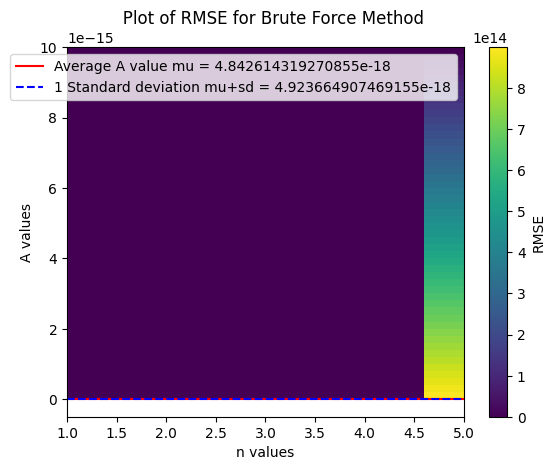

In [16]:
#create lines for the mean optimum value and one standard deviation
mu = np.mean(A)*np.ones([error_gridsearch.shape[1]])
sigma = np.std(A)*np.ones([error_gridsearch.shape[1]])

#Plot lines on top of grid search results
plt.imshow(error_gridsearch, interpolation='nearest', aspect='auto',extent=[1,5,min(A_gridsearch),max(A_gridsearch)])
cbar = plt.colorbar()
plt.clim([error_gridsearch.min(),error_gridsearch.max()])
cbar.set_label('RMSE')
plt.ylabel('A values')
plt.xlabel('n values')
plt.title('   Plot of RMSE for Brute Force Method');
plt.plot(N_gridsearch,mu,'r-',label="Average A value mu = "+str(mu[0]));
plt.plot(N_gridsearch,mu+sigma,'b--',label="1 Standard deviation mu+sd = "+str(mu[0]+sigma[0]))
plt.legend()
print(sigma)

#### 12. For each of A and model RMS error, use the normal distribution model to generate 1000 simulated values with the mean and standard deviations from your Monte-Carlo simulations.

In [17]:
s = np.random.normal(np.mean(A), np.std(A), 1000)

#### 13. Use MATLAB’s kstest2 function to compare the actual distributions from your Monte-carlo parameter fitting (#10), with those simulated assuming a normal distribution (#12).

In [18]:
ks_2samp(A, s)

KstestResult(statistic=0.111, pvalue=8.74452446093763e-06, statistic_location=4.863159179687506e-18, statistic_sign=1)

Since the statistic is small these two distributions are very similar.